In [15]:
import geopandas as gpd
from libpysal.weights.contiguity import Queen
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from splot.libpysal import plot_spatial_weights
%matplotlib inline

In [5]:
path_meshblocks = '../../../../Google Drive/Doutorado/Election_Forensics/data/RS/IBGE/meshblocks/2010/processed/weighting_area/shapefiles/RS.shp'
data = gpd.read_file(path_meshblocks)
#data.drop(['CD_GEOCODB', 'NM_BAIRRO', 'NM_SUBDIST'], axis=1, inplace=True)
len(data)

826

In [4]:
#data['geometry'] = data.buffer(0.0001)
dis_data =  data.dissolve(by='Cod_ap', aggfunc='first')
dis_data['geometry'] = [Polygon(poly) for poly in dis_data.exterior]
len(dis_data)

826

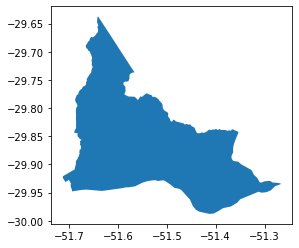

,Cod_ap,Cod_setor,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,NM_UF,CD_GEOCODU,geometry
770,4322004003001,432200405000008,URBANO,None,None,43220040500,None,432200405,TRIUNFO,4322004,TRIUNFO,SÃO JERÔNIMO,METROPOLITANA DE PORTO ALEGRE,RS,43,"POLYGON ((-51.31286 -29.94870, -51.34999 -29.9..."


In [25]:
rs_data = data[data['Cod_ap']==4322004003001]
#print(len(rs_data))
fig, ax = plt.subplots()
rs_data.plot(ax=ax)
plt.show()
rs_data

H:\anaconda3\envs\Election_Forensics\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 10.
  warnings.warn(message)
H:\anaconda3\envs\Election_Forensics\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
H:\anaconda3\envs\Election_Forensics\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


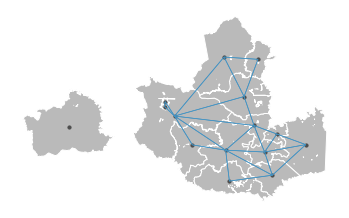

In [23]:
rs_data = data[data['NM_MICRO']=='CRUZ ALTA']
weights = Queen.from_dataframe(rs_data)
fig, ax = plt.subplots()
plot_spatial_weights(weights, rs_data, ax=ax)
plt.show()

In [24]:
rs_data

,Cod_ap,Cod_setor,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,NM_UF,CD_GEOCODU,geometry
12,4300554001001,430055430000001,URBANO,None,None,43005543000,None,430055430,TREZE DE MAIO,4300554,ALTO ALEGRE,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-52.96680 -28.81628, -52.96609 -28.8..."
67,4302238001001,430223805000001,URBANO,None,None,43022380500,None,430223805,BOA VISTA DO INCRA,4302238,BOA VISTA DO INCRA,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-53.30293 -28.83038, -53.30267 -28.8..."
108,4304101001001,430410105000001,URBANO,None,None,43041010500,None,430410105,CAMPOS BORGES,4304101,CAMPOS BORGES,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-52.96495 -28.88456, -52.96382 -28.8..."
212,4306106003001,430610605000031,URBANO,430610605042,Lizabel,43061060500,None,430610605,CRUZ ALTA,4306106,CRUZ ALTA,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-53.59169 -28.63230, -53.59179 -28.6..."
213,4306106003002,430610605000001,URBANO,430610605067,Centro,43061060500,None,430610605,CRUZ ALTA,4306106,CRUZ ALTA,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-53.59825 -28.65292, -53.59826 -28.6..."
214,4306106003003,430610605000023,URBANO,430610605005,Acelino Flores,43061060500,None,430610605,CRUZ ALTA,4306106,CRUZ ALTA,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-53.30463 -28.63758, -53.30186 -28.6..."
252,4307500001001,430750030000003,RURAL,None,None,43075003000,None,430750030,DEPÓSITO,4307500,ESPUMOSO,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-52.71600 -28.95478, -52.71674 -28.9..."
279,4308458001001,430845805000001,URBANO,None,None,43084580500,None,430845805,FORTALEZA DOS VALOS,4308458,FORTALEZA DOS VALOS,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-53.27940 -28.97789, -53.27640 -28.9..."
326,4310009001001,431000920000003,RURAL,None,None,43100092000,None,431000920,SANTO ANTÔNIO DO BOM RETIRO,4310009,IBIRUBÁ,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-53.03654 -28.64348, -53.03757 -28.6..."
352,4310876001001,431087605000001,URBANO,None,None,43108760500,None,431087605,JACUIZINHO,4310876,JACUIZINHO,CRUZ ALTA,NOROESTE RIO-GRANDENSE,RS,43,"POLYGON ((-52.97253 -29.10340, -52.97115 -29.1..."
